#Task 6. Algorithms on graphs. Path search algorithms on weighted graphs
Alexandra Matveeva J4134c

In [ ]:
# Dijkstra's 
# A* 
# Bellman-Ford algorithms

In [80]:
import random 
import numpy as np
from collections import defaultdict 
import networkx as nx
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import pylab

In [81]:
def adjacency_matrix(vertices, edges):
  matrix = np.zeros((vertices, vertices))
  edge = 0
  while edge < edges:
    i = np.random.randint(0, vertices)
    j = np.random.randint(0, vertices)
    if i != j and matrix[i][j] == 0:
      matrix[i][j] = np.random.randint(0, 100)
      matrix[j][i] = matrix[i][j]
      edge += 1
  return matrix

In [82]:
def matrixToList(matrix): 
  adj_list = {}
  for i in range(len(matrix)): 
    temp = {}
    for j in range(len(matrix[i])): 
      if matrix[i][j] != 0: 
        temp["{0}".format(j)] = matrix[i][j]
      else:
        temp["{0}".format(j)] = 0
    adj_list["{0}".format(i)] = temp 
  return adj_list

Adjecency matrix:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 18.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 33.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 53.]
 [ 0. 18.  0.  0.  0. 33.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 20.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 53.  0.  0.  0.  0.  0.]] 


Graph visualization: :



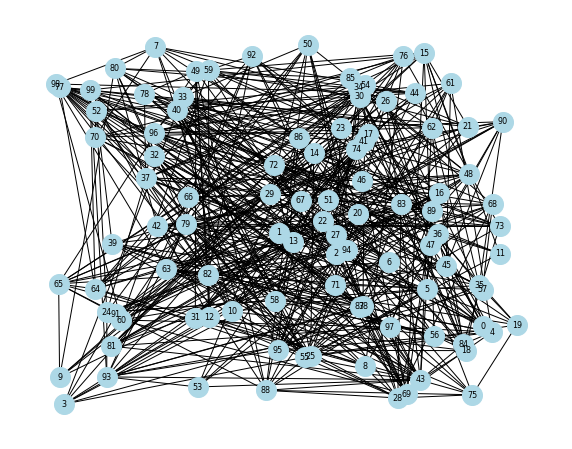

In [83]:
# Matrix generation
V = 100
E = 500
adj_matrix = adjacency_matrix(V, E)
adj_list = matrixToList(adj_matrix)
print('Adjecency matrix:\n', adj_matrix[:15, :15], '\n')
print('\nGraph visualization: :\n')
G = nx.Graph(adj_matrix)
pos = nx.random_layout(G)
plt.figure(3, figsize=(10, 8))
labels = {}
for k in range(V):
  labels[k] = "{0}".format(k)
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color="black")
nx.draw(G, pos, node_size = 400, node_color = "lightblue", edge_color = "black")

In [84]:
experiments = 10
source = np.random.randint(0, V)
target = np.random.randint(0, V)
print(source, '->', target)

31 -> 60


In [85]:
# Dijkstra's algorithm

time = 0
for i in range(experiments):
  start_time = timer()
  path = nx.algorithms.shortest_paths.weighted.dijkstra_path(G, source, target, weight='weight')
  time += timer() - start_time
print("Dijkstra's algorithm: ", path)
print('Time: ', time / experiments)

Dijkstra's algorithm:  [31, 93, 83, 98, 60]
Time:  0.0006903019997480442


In [86]:
# Bellman-Ford algorithm

time = 0
for i in range(experiments):
  start_time = timer()
  path = nx.algorithms.shortest_paths.weighted.bellman_ford_path(G, source, target, weight='weight')
  time += timer() - start_time
print("Bellman-Ford algorithm: ", path)
print('Time: ', time / experiments)

Bellman-Ford algorithm:  [31, 93, 83, 98, 60]
Time:  0.0044490176999715915


In [87]:
def delete_node(graph, count):
  for i in range(count):
    random_node = random.choice(list(graph.nodes))
    graph.remove_node(random_node)
  return graph

In [88]:
i = 10
j = 20
obstacles = 40

gg = nx.grid_graph(dim=[i, j])
gg = delete_node(gg, obstacles)

pos = dict([nd, nd] for nd in gg.nodes()) 


A* algorithm
(1, 8) -> (11, 6)
(16, 9) -> (16, 8)
(17, 4) -> (0, 2)
(6, 1) -> (18, 9)
(15, 8) -> (11, 3)


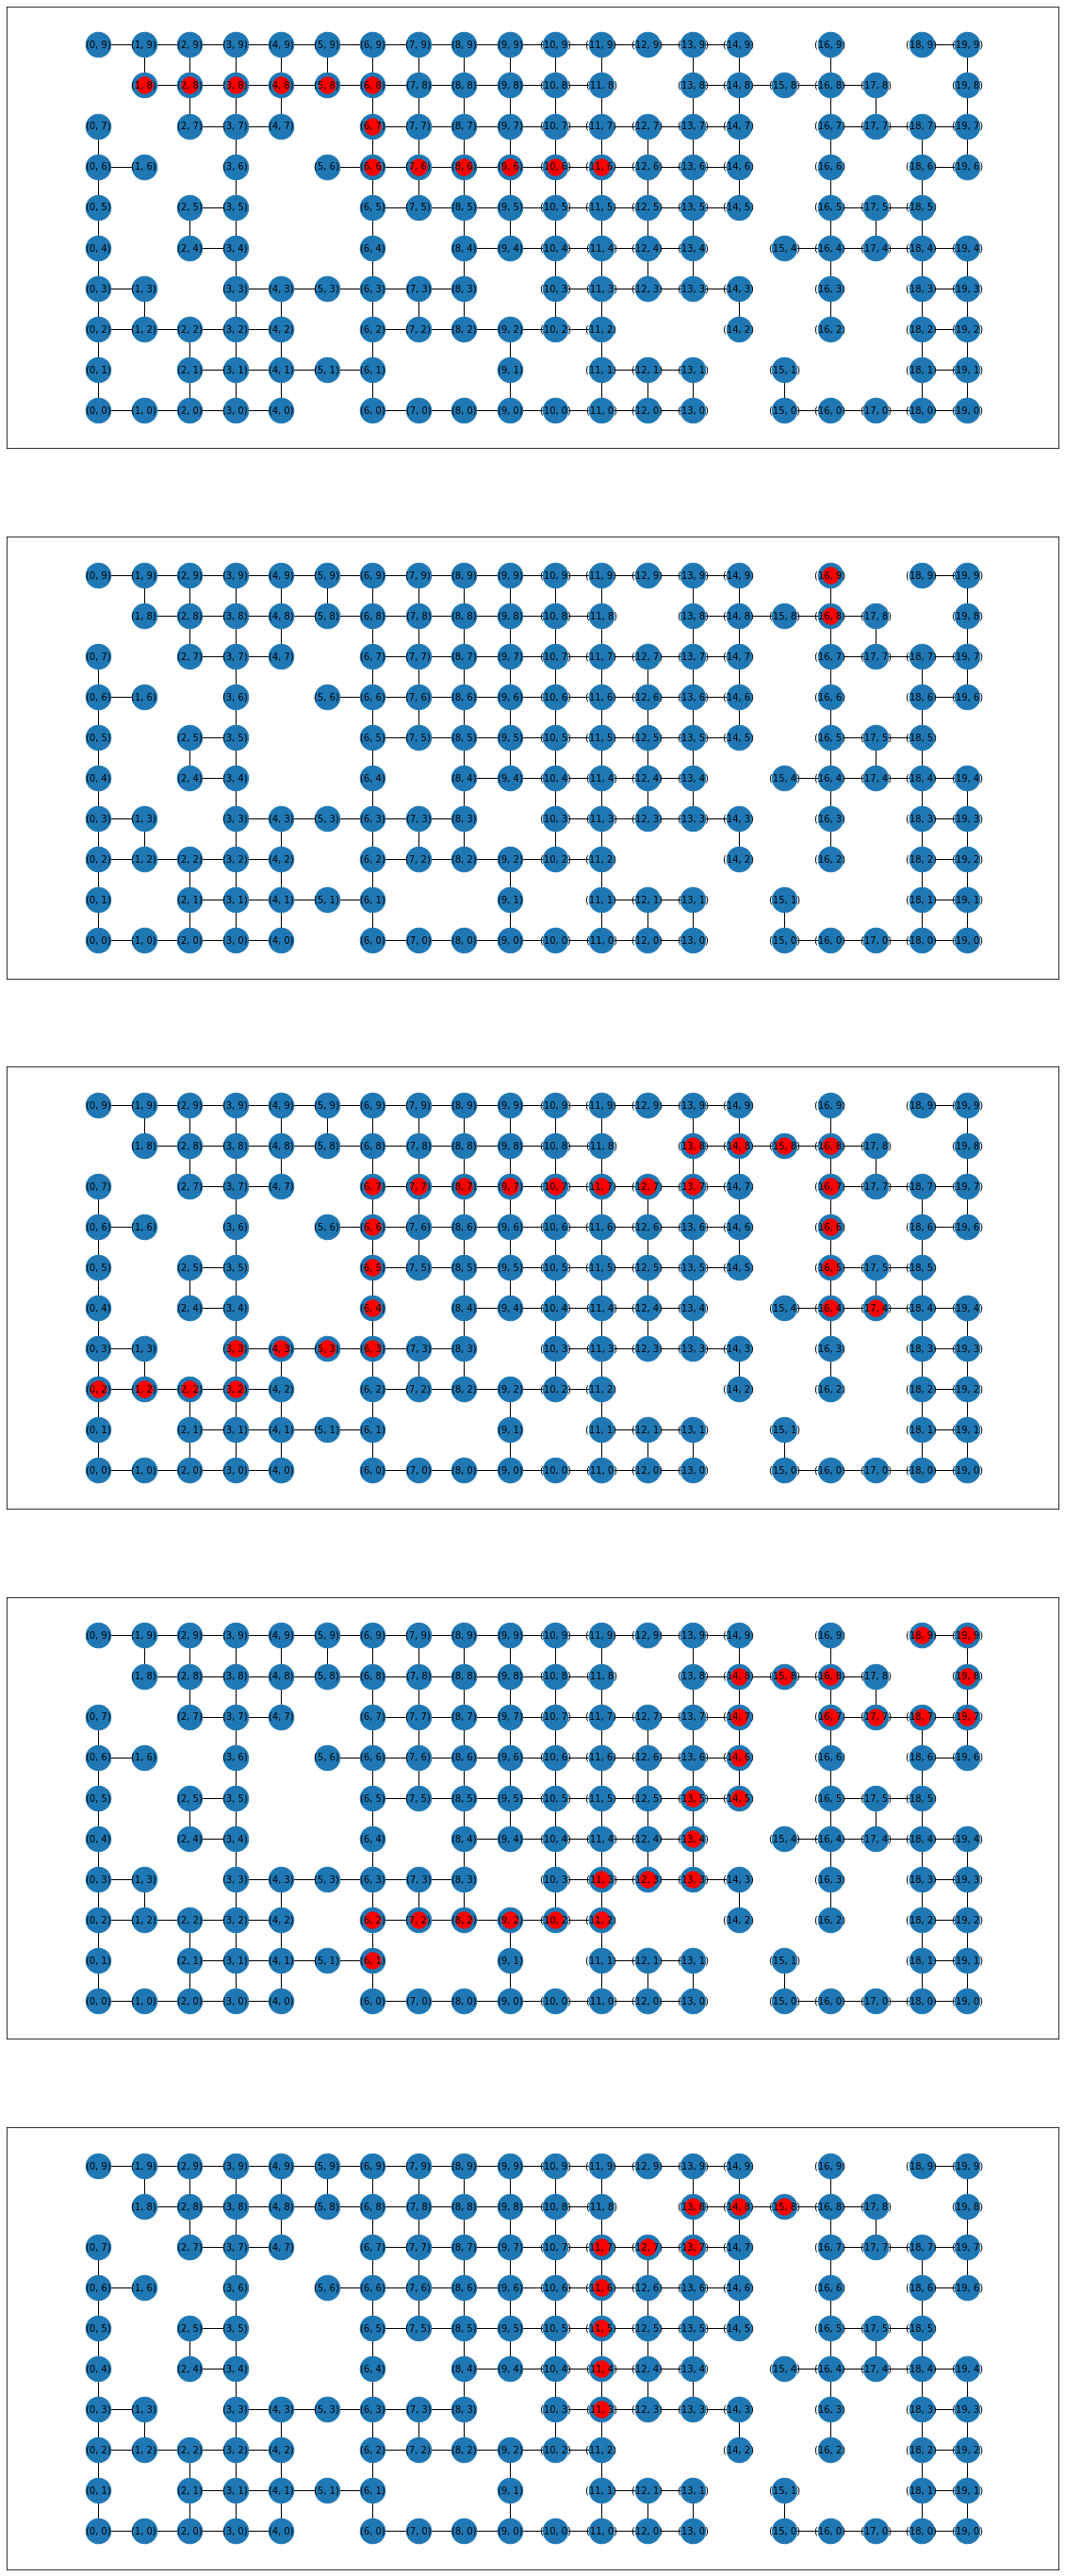

In [89]:
# A* algorithm
experiments = 5

print('A* algorithm')
fig = plt.figure(figsize=(20,50));
for i in range(experiments):
  start = random.choice(list(gg.nodes)) 
  target = random.choice(list(gg.nodes))

  print(start, '->', target)
  pylab.subplot(5, 1, i+1)
  path = nx.algorithms.shortest_paths.astar.astar_path(gg, start, target)
  nx.draw_networkx(gg, pos=pos, node_size=700, font_color="black", font_size=10)
  nx.draw_networkx_nodes(gg, pos=pos, nodelist=path, node_color='r')
